# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 09 vs Chr 09 Inversion

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 1

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_1L.bmp',
   'D:\\Users\

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_7L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_9L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_20L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_8L.bmp',
   'D:\\Users\\Chuan\\Documen

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
  'D:\\Users\\Chuan\\Docume

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_09', 'chr_9_inversion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  1
chr_09
   Train: 
        193002-9p12q13_12L.bmp
        193002-9p12q13_13L.bmp
        193002-9p12q13_14L.bmp
        193002-9p12q13_15L.bmp
        193002-9p12q13_16L.bmp
        193002-9p12q13_17L.bmp
        193002-9p12q13_18L.bmp
        193002-9p12q13_19L.bmp
        193002-9p12q13_1L.bmp
        193002-9p12q13_24L.bmp
        193002-9p12q13_3L.bmp
        193002-9p12q13_4L.bmp
        193002-9p12q13_5L.bmp
        193002-9p12q13_6L.bmp
        193002-9p12q13_8L.bmp
        W07391-9p12q_11L.bmp
        W07391-9p12q_12L.bmp
        W07391-9p12q_13L.bmp
        W07391-9p12q_14L.bmp
        W07391-9p12q_15L.bmp
        W07391-9p12q_16L.bmp
        W07391-9p12q_17L.bmp
        W07391-9p12q_18L.bmp
        W07391-9p12q_20L.bmp
        W07391-9p12q_22L.bmp
        W07391-9p12q_3L.bmp
        W07391-9p12q_5L.bmp
        W07391-9p12q_6L.bmp
        W07391-9p12q_7L.bmp
        W07391-9p12q_9L.bmp
        W15206-_9p12q_11L.bmp
        W15206-_9p12q_12L.bmp
        W15206-_

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_09': 0, 
               'chr_9_inversion': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_09',
                1: 'chr_9_inversion'
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
len(X_train)

371

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
start = time.time()

### 3.2.5. Compile the modal

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [31]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
6/6 [==============================] - 6s 577ms/step - loss: 811.5665 - accuracy: 0.4879 - val_loss: 33.4993 - val_accuracy: 0.5968
Epoch 2/500
6/6 [==============================] - 1s 162ms/step - loss: 7.7479 - accuracy: 0.5526 - val_loss: 0.5665 - val_accuracy: 0.8710
Epoch 3/500
6/6 [==============================] - 1s 127ms/step - loss: 0.8606 - accuracy: 0.7951 - val_loss: 0.4095 - val_accuracy: 0.8548
Epoch 4/500
6/6 [==============================] - 1s 127ms/step - loss: 1.4998 - accuracy: 0.7682 - val_loss: 6.4744 - val_accuracy: 0.4032
Epoch 5/500
6/6 [==============================] - 1s 126ms/step - loss: 3.8754 - accuracy: 0.7035 - val_loss: 0.3987 - val_accuracy: 0.8226
Epoch 6/500
6/6 [==============================] - 1s 126ms/step - loss: 0.3626 - accuracy: 0.8706 - val_loss: 0.2677 - val_accuracy: 0.8871
Epoch 7/500
6/6 [==============================] - 1s 122ms/step - loss: 0.2570 - accuracy: 0.9084 - val_loss: 0.4257 - val_accuracy: 0.8387
Epoch 8/50

6/6 [==============================] - 1s 128ms/step - loss: 9.8258e-07 - accuracy: 1.0000 - val_loss: 0.7503 - val_accuracy: 0.8871
Epoch 114/500
6/6 [==============================] - 1s 122ms/step - loss: 9.5848e-07 - accuracy: 1.0000 - val_loss: 0.7515 - val_accuracy: 0.8871
Epoch 115/500
6/6 [==============================] - 1s 118ms/step - loss: 9.3471e-07 - accuracy: 1.0000 - val_loss: 0.7524 - val_accuracy: 0.8871
Epoch 116/500
6/6 [==============================] - 1s 118ms/step - loss: 9.1446e-07 - accuracy: 1.0000 - val_loss: 0.7534 - val_accuracy: 0.8871
Epoch 117/500
6/6 [==============================] - 1s 120ms/step - loss: 8.9133e-07 - accuracy: 1.0000 - val_loss: 0.7545 - val_accuracy: 0.8871
Epoch 118/500
6/6 [==============================] - 1s 127ms/step - loss: 8.7334e-07 - accuracy: 1.0000 - val_loss: 0.7559 - val_accuracy: 0.8871
Epoch 119/500
6/6 [==============================] - 1s 122ms/step - loss: 8.5277e-07 - accuracy: 1.0000 - val_loss: 0.7571 - val_ac

Epoch 169/500
6/6 [==============================] - 1s 127ms/step - loss: 3.3128e-07 - accuracy: 1.0000 - val_loss: 0.7950 - val_accuracy: 0.8871
Epoch 170/500
6/6 [==============================] - 1s 126ms/step - loss: 3.2582e-07 - accuracy: 1.0000 - val_loss: 0.7955 - val_accuracy: 0.8871
Epoch 171/500
6/6 [==============================] - 1s 124ms/step - loss: 3.1939e-07 - accuracy: 1.0000 - val_loss: 0.7960 - val_accuracy: 0.8871
Epoch 172/500
6/6 [==============================] - 1s 124ms/step - loss: 3.1457e-07 - accuracy: 1.0000 - val_loss: 0.7964 - val_accuracy: 0.8871
Epoch 173/500
6/6 [==============================] - 1s 125ms/step - loss: 3.1104e-07 - accuracy: 1.0000 - val_loss: 0.7968 - val_accuracy: 0.8871
Epoch 174/500
6/6 [==============================] - 1s 123ms/step - loss: 3.0589e-07 - accuracy: 1.0000 - val_loss: 0.7971 - val_accuracy: 0.8871
Epoch 175/500
6/6 [==============================] - 1s 123ms/step - loss: 3.0075e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 225/500
6/6 [==============================] - 1s 122ms/step - loss: 1.5391e-07 - accuracy: 1.0000 - val_loss: 0.8127 - val_accuracy: 0.8871
Epoch 226/500
6/6 [==============================] - 1s 121ms/step - loss: 1.5230e-07 - accuracy: 1.0000 - val_loss: 0.8130 - val_accuracy: 0.8871
Epoch 227/500
6/6 [==============================] - 1s 119ms/step - loss: 1.5166e-07 - accuracy: 1.0000 - val_loss: 0.8131 - val_accuracy: 0.8871
Epoch 228/500
6/6 [==============================] - 1s 121ms/step - loss: 1.4941e-07 - accuracy: 1.0000 - val_loss: 0.8136 - val_accuracy: 0.8871
Epoch 229/500
6/6 [==============================] - 1s 120ms/step - loss: 1.4652e-07 - accuracy: 1.0000 - val_loss: 0.8140 - val_accuracy: 0.8871
Epoch 230/500
6/6 [==============================] - 1s 127ms/step - loss: 1.4524e-07 - accuracy: 1.0000 - val_loss: 0.8144 - val_accuracy: 0.8871
Epoch 231/500
6/6 [==============================] - 1s 124ms/step - loss: 1.4363e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 281/500
6/6 [==============================] - 1s 125ms/step - loss: 8.6756e-08 - accuracy: 1.0000 - val_loss: 0.8306 - val_accuracy: 0.8871
Epoch 282/500
6/6 [==============================] - 1s 126ms/step - loss: 8.5792e-08 - accuracy: 1.0000 - val_loss: 0.8308 - val_accuracy: 0.8871
Epoch 283/500
6/6 [==============================] - 1s 122ms/step - loss: 8.5471e-08 - accuracy: 1.0000 - val_loss: 0.8310 - val_accuracy: 0.8871
Epoch 284/500
6/6 [==============================] - 1s 121ms/step - loss: 8.3864e-08 - accuracy: 1.0000 - val_loss: 0.8311 - val_accuracy: 0.8871
Epoch 285/500
6/6 [==============================] - 1s 126ms/step - loss: 8.3543e-08 - accuracy: 1.0000 - val_loss: 0.8311 - val_accuracy: 0.8871
Epoch 286/500
6/6 [==============================] - 1s 124ms/step - loss: 8.2900e-08 - accuracy: 1.0000 - val_loss: 0.8312 - val_accuracy: 0.8871
Epoch 287/500
6/6 [==============================] - 1s 126ms/step - loss: 8.1936e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 337/500
6/6 [==============================] - 1s 119ms/step - loss: 2.2492e-09 - accuracy: 1.0000 - val_loss: 0.8155 - val_accuracy: 0.8871
Epoch 338/500
6/6 [==============================] - 1s 118ms/step - loss: 2.2492e-09 - accuracy: 1.0000 - val_loss: 0.8110 - val_accuracy: 0.8871
Epoch 339/500
6/6 [==============================] - 1s 122ms/step - loss: 6.1051e-09 - accuracy: 1.0000 - val_loss: 0.8216 - val_accuracy: 0.8871
Epoch 340/500
6/6 [==============================] - 1s 141ms/step - loss: 1.6066e-09 - accuracy: 1.0000 - val_loss: 0.8260 - val_accuracy: 0.8871
Epoch 341/500
6/6 [==============================] - 1s 131ms/step - loss: 1.9279e-09 - accuracy: 1.0000 - val_loss: 0.8200 - val_accuracy: 0.8871
Epoch 342/500
6/6 [==============================] - 1s 129ms/step - loss: 1.6066e-09 - accuracy: 1.0000 - val_loss: 0.7947 - val_accuracy: 0.8871
Epoch 343/500
6/6 [==============================] - 1s 134ms/step - loss: 6.4264e-09 - accuracy: 1.0000 - val_loss: 0

6/6 [==============================] - 1s 132ms/step - loss: 9.0435e-06 - accuracy: 1.0000 - val_loss: 0.5529 - val_accuracy: 0.9194
Epoch 394/500
6/6 [==============================] - 1s 124ms/step - loss: 8.7068e-06 - accuracy: 1.0000 - val_loss: 0.5536 - val_accuracy: 0.9194
Epoch 395/500
6/6 [==============================] - 1s 122ms/step - loss: 8.4521e-06 - accuracy: 1.0000 - val_loss: 0.5540 - val_accuracy: 0.9194
Epoch 396/500
6/6 [==============================] - 1s 122ms/step - loss: 8.1841e-06 - accuracy: 1.0000 - val_loss: 0.5544 - val_accuracy: 0.9194
Epoch 397/500
6/6 [==============================] - 1s 122ms/step - loss: 7.9538e-06 - accuracy: 1.0000 - val_loss: 0.5549 - val_accuracy: 0.9194
Epoch 398/500
6/6 [==============================] - 1s 123ms/step - loss: 7.7466e-06 - accuracy: 1.0000 - val_loss: 0.5551 - val_accuracy: 0.9194
Epoch 399/500
6/6 [==============================] - 1s 124ms/step - loss: 7.5166e-06 - accuracy: 1.0000 - val_loss: 0.5558 - val_ac

Epoch 449/500
6/6 [==============================] - 1s 123ms/step - loss: 2.8882e-06 - accuracy: 1.0000 - val_loss: 0.5836 - val_accuracy: 0.9194
Epoch 450/500
6/6 [==============================] - 1s 125ms/step - loss: 2.8343e-06 - accuracy: 1.0000 - val_loss: 0.5840 - val_accuracy: 0.9194
Epoch 451/500
6/6 [==============================] - 1s 126ms/step - loss: 2.7954e-06 - accuracy: 1.0000 - val_loss: 0.5844 - val_accuracy: 0.9194
Epoch 452/500
6/6 [==============================] - 1s 125ms/step - loss: 2.7581e-06 - accuracy: 1.0000 - val_loss: 0.5847 - val_accuracy: 0.9194
Epoch 453/500
6/6 [==============================] - 1s 121ms/step - loss: 2.7195e-06 - accuracy: 1.0000 - val_loss: 0.5851 - val_accuracy: 0.9194
Epoch 454/500
6/6 [==============================] - 1s 121ms/step - loss: 2.6807e-06 - accuracy: 1.0000 - val_loss: 0.5856 - val_accuracy: 0.9194
Epoch 455/500
6/6 [==============================] - 1s 123ms/step - loss: 2.6395e-06 - accuracy: 1.0000 - val_loss: 0

### 3.2.7 Summary

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [33]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 24932), started 22:26:47 ago. (Use '!kill 24932' to kill it.)

2553.1598579883575


In [ ]:
end = time.time()
print(end - start)

## 3.8 Save the Model

In [34]:
model.save('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_09_cnn_iteration_1\assets


## 3.9 Load the Model

In [35]:
model_reload = keras.models.load_model('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [36]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.919


In [37]:
len(X_test)

62

In [38]:
y_predict = model_reload.predict(X_test)

In [39]:
len(y_predict)

62

In [40]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [41]:
len(y_predict_filtered)

62

In [42]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [43]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [44]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [45]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [46]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [47]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
y_predict

array([[9.99971747e-01, 2.09784798e-06],
       [8.72596145e-01, 1.03924135e-02],
       [9.99998450e-01, 1.37214855e-07],
       [9.99988556e-01, 5.19266507e-07],
       [9.99976039e-01, 2.03335844e-06],
       [9.99968886e-01, 2.78124503e-07],
       [9.75154877e-01, 2.51404330e-04],
       [1.00000000e+00, 1.79644858e-11],
       [9.99772251e-01, 3.10829319e-06],
       [9.99970675e-01, 3.81635289e-07],
       [1.00000000e+00, 1.80124526e-11],
       [9.99921441e-01, 9.00136001e-06],
       [9.99591649e-01, 1.56439546e-06],
       [1.78337824e-02, 4.52137180e-02],
       [9.99972701e-01, 5.90687534e-07],
       [9.96092975e-01, 5.72145102e-04],
       [9.97021735e-01, 1.35551280e-04],
       [9.99995828e-01, 7.08742576e-08],
       [9.99578297e-01, 3.75756972e-05],
       [9.97837722e-01, 9.39704551e-05],
       [1.00000000e+00, 1.52505148e-14],
       [9.99975562e-01, 3.19379524e-07],
       [9.99802053e-01, 1.94061304e-05],
       [9.98492718e-01, 2.22373536e-04],
       [9.851236

### 3.10.2. Classification Report

In [49]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.92      0.95      0.93        37
chr_9_inversion       0.92      0.88      0.90        25

      micro avg       0.92      0.92      0.92        62
      macro avg       0.92      0.91      0.92        62
   weighted avg       0.92      0.92      0.92        62



### 3.10.3. Confusion Matrix

In [50]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

chr_09  chr_9_inversion
chr_09               35                2
chr_9_inversion       3               22

#### Heat Map

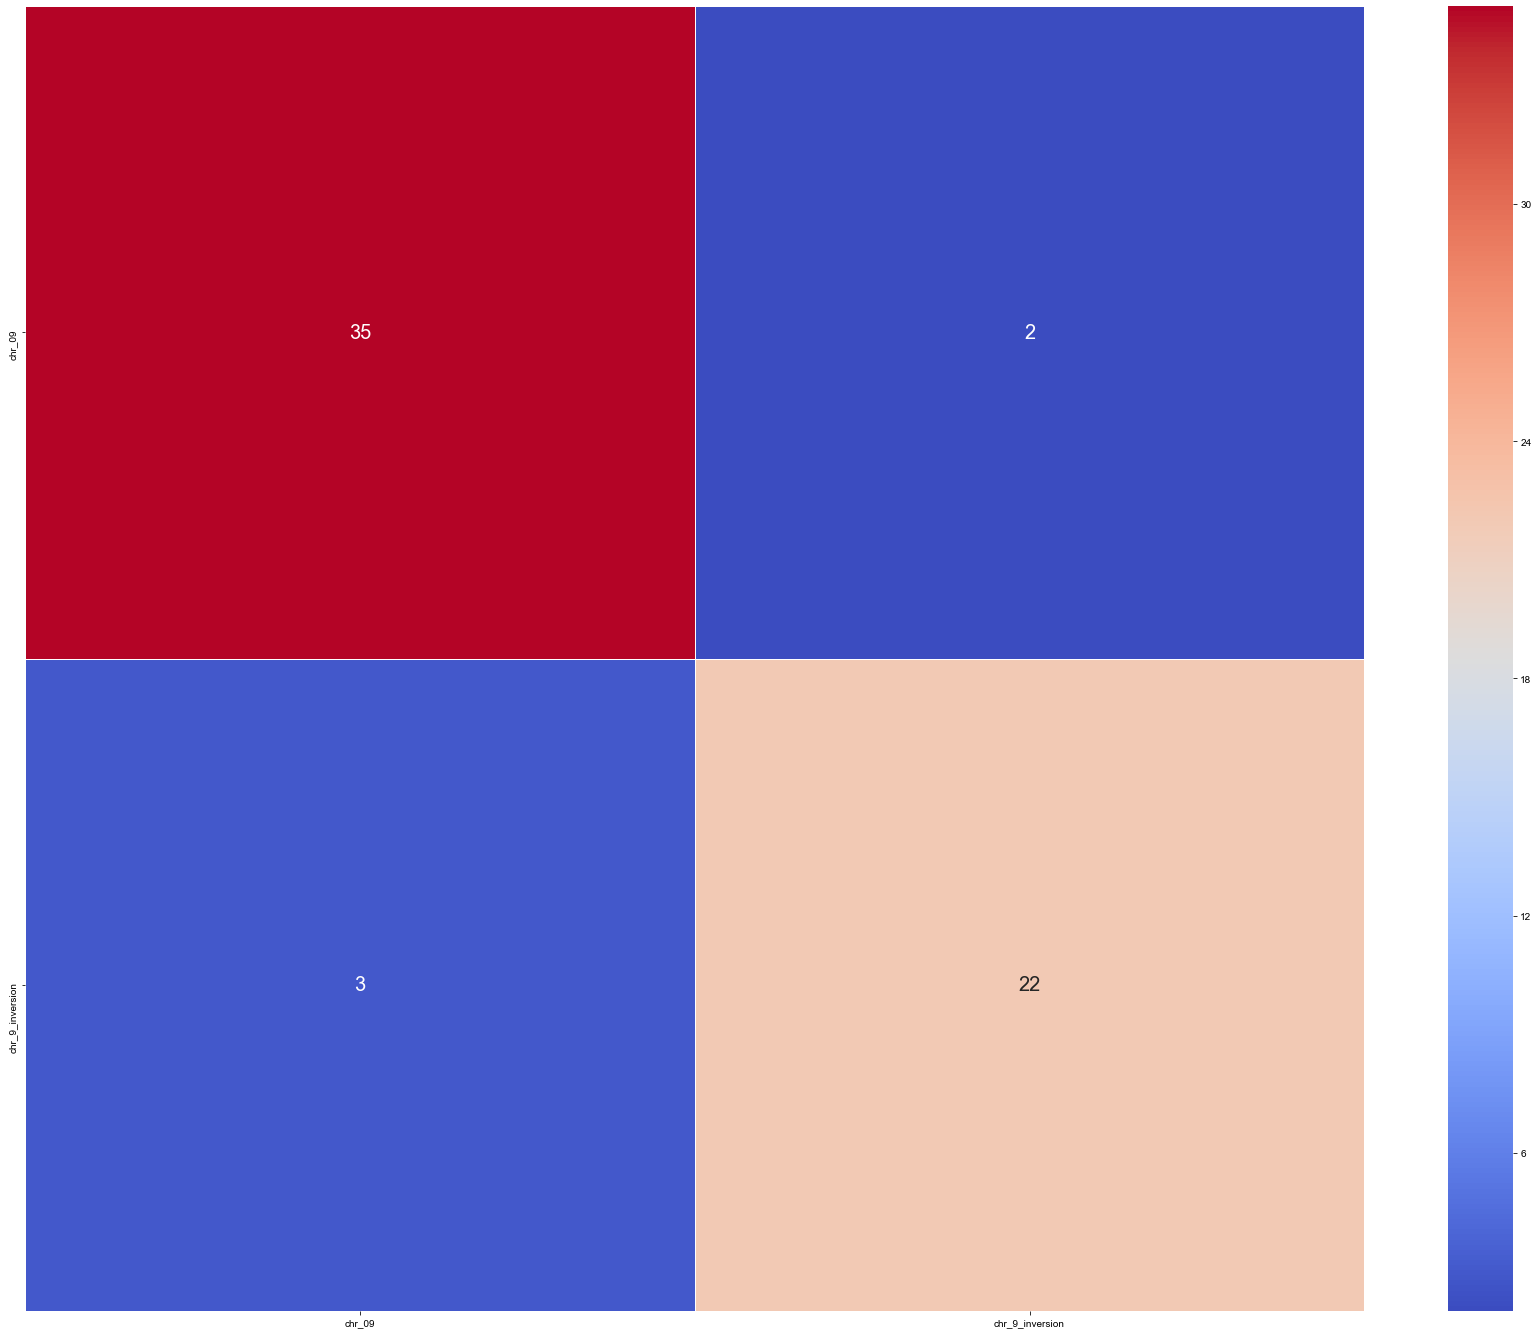

In [51]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [52]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_09_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [53]:
y_predict

array([[9.99971747e-01, 2.09784798e-06],
       [8.72596145e-01, 1.03924135e-02],
       [9.99998450e-01, 1.37214855e-07],
       [9.99988556e-01, 5.19266507e-07],
       [9.99976039e-01, 2.03335844e-06],
       [9.99968886e-01, 2.78124503e-07],
       [9.75154877e-01, 2.51404330e-04],
       [1.00000000e+00, 1.79644858e-11],
       [9.99772251e-01, 3.10829319e-06],
       [9.99970675e-01, 3.81635289e-07],
       [1.00000000e+00, 1.80124526e-11],
       [9.99921441e-01, 9.00136001e-06],
       [9.99591649e-01, 1.56439546e-06],
       [1.78337824e-02, 4.52137180e-02],
       [9.99972701e-01, 5.90687534e-07],
       [9.96092975e-01, 5.72145102e-04],
       [9.97021735e-01, 1.35551280e-04],
       [9.99995828e-01, 7.08742576e-08],
       [9.99578297e-01, 3.75756972e-05],
       [9.97837722e-01, 9.39704551e-05],
       [1.00000000e+00, 1.52505148e-14],
       [9.99975562e-01, 3.19379524e-07],
       [9.99802053e-01, 1.94061304e-05],
       [9.98492718e-01, 2.22373536e-04],
       [9.851236

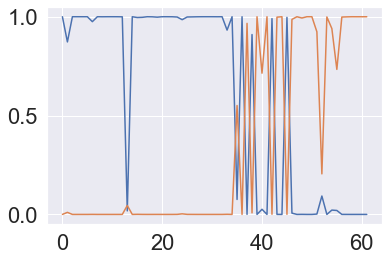

In [54]:
plt.plot(y_predict)

In [55]:
y_predict_1D = y_predict[:,0]

In [56]:
y_predict_1D_processed = 1- y_predict_1D

In [57]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [58]:
auc_rf

0.9772972972972972

In [59]:
x = y = np.arange(0,1.1,0.1)

In [60]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

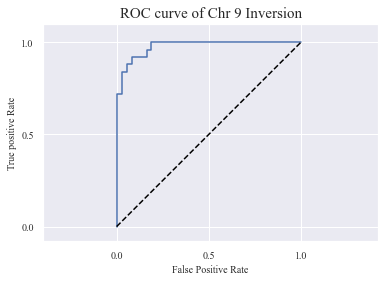

In [61]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr 9 Inversion', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_09_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [62]:
auc_value = auc(fpr, tpr)

In [63]:
print('AUC is ', auc_value)

AUC is  0.9772972972972972


# Results

In [64]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.919


In [65]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.92      0.95      0.93        37
chr_9_inversion       0.92      0.88      0.90        25

      micro avg       0.92      0.92      0.92        62
      macro avg       0.92      0.91      0.92        62
   weighted avg       0.92      0.92      0.92        62



In [66]:
type(performanceReport)

str

In [67]:
confusion

chr_09  chr_9_inversion
chr_09               35                2
chr_9_inversion       3               22

In [68]:
print('AUC is ', auc_value)

AUC is  0.9772972972972972


## Export to a text file

In [69]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()